# EDA of Movies.csv 

* src: https://www.kaggle.com/rounakbanik/the-movies-dataset
* Team Members: CB.EN.U4CSE17610,11

#### Introduction:

Movies have become an integral part of life. It is the best way to escape reality. Global movie bussiness was worth USD 136 billion in 2018. About 60,000 to 70,000 movies are made and released each year. But only few of those movies become blockbusters and rewrite history. 'Titanic' was one such movie. With an initial worldwide gross of over USD 1.84 billion, Titanic was the first film to reach the billion-dollar mark, and became the highest-grossing film ever at the time, until Cameron's 'Avatar' surpassed it in 2010. 
 
Machine Learning has made many tasks ranging from Stock Market Prediction to predicting heart attack easier and accurate. But can we actually find out a foolproof recipe for making a profitale movie? Let's find out.  

#### Dataset:
We have used the movies.csv dataset which has metadata of 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include movie_name, budget, original_language, countries, etc.

#### Objective:
To preprocess the movies.csv dataset and to analyze the trend in order to form an hypothesis about how to make a profitable movie.

## Necessary Packages

In [39]:
import pandas as pd
import seaborn as sns
import ast,json
from matplotlib import pyplot as plt
from datetime import datetime

## Read csv files

In [40]:
movies=pd.read_csv('movies.csv')

C:\Users\R.K.Athisha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


This dataset contains the metadata of 45,000 movies released on or before July 2017. Data points include budget,title,genres, release data, TMDB vote counts and vote average.

## Data Overview

In [41]:
movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{""id"": 10194, ""name"": ""Toy Story Collection"", ...",30000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy""s toys live happily in his ...",...,30-10-1995,373554033.0,81.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Toy Story,False,7.7,5415.0
1,FALSE,NaN,65000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,15-12-1995,262797249.0,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [42]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

## Data Cleaning

In [43]:
# Deleting irrelevant/redundant columns from 'movies'

print('Before: '+str(movies.shape))
cols={'homepage','status','tagline','original_language','homepage','overview','production_companies','original_title','imdb_id','belongs_to_collection','id'}
movies=movies.drop(cols,axis=1)
print('After: '+str(movies.shape))

Before: (45466, 24)
After: (45466, 14)


In [44]:
#Checking for duplicate records in 'movies'

movie_dup=movies[movies.duplicated()]
r,c=movie_dup.shape
if(r>0):
    print('There are duplicated records in movies: '+str(r))
else:
    print('There are no duplicated records in movies')
    
movies=movies.drop_duplicates(keep='first')
print('Duplicates dropped')

There are duplicated records in movies: 13
Duplicates dropped


In [45]:
# Replacing all zero entries in budget,revenue,runtime with NaN

import numpy as np
cols=['budget']
movies[cols]=movies[cols].replace('0',np.nan)
cols=['revenue']
movies[cols]=movies[cols].replace(0,np.nan)
cols=['runtime']
movies[cols]=movies[cols].replace(0,np.nan)

In [46]:
# Drop all the records whose revenue or budget or runtime is NaN

cols=['budget','revenue','runtime']
print('Before: '+str(movies.shape))
movies=movies.dropna(subset=cols)
print('After: '+str(movies.shape))

Before: (45453, 14)
After: (5369, 14)


In [47]:
print(movies.release_date.dtype)

object


In [48]:
#Converting Dtype of release_date to Date so that we can perform date related operations

movies['release_date']=pd.to_datetime(movies['release_date'])
print(movies.release_date.dtype)

datetime64[ns]


In [49]:
print(movies.budget.dtype)
print(movies.revenue.dtype)

object
float64


In [50]:
# budget,revenue to int64

cols=['budget','revenue']
movies[cols]=movies[cols].applymap(np.int64)
print(movies.budget.dtype)
print(movies.revenue.dtype)

int64
int64


In [51]:
movies.head(2)

,adult,budget,genres,popularity,poster_path,production_countries,release_date,revenue,runtime,spoken_languages,title,video,vote_average,vote_count
0,FALSE,30000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-10-30,373554033,81.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Toy Story,False,7.7,5415.0
1,FALSE,65000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-12-15,262797249,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Jumanji,False,6.9,2413.0


In [52]:
# Processing JSON format entries 

def convert(column, key):
    for index,i in zip(movies.index,movies[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies.loc[index,column]=str(list1)

In [53]:
convert("genres","name")

In [54]:
convert("spoken_languages","name")

In [55]:
convert("production_countries","name")

In [56]:
movies.head(2)

,adult,budget,genres,popularity,poster_path,production_countries,release_date,revenue,runtime,spoken_languages,title,video,vote_average,vote_count
0,FALSE,30000000,"['Animation', 'Comedy', 'Family']",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,['United States of America'],1995-10-30,373554033,81.0,['English'],Toy Story,False,7.7,5415.0
1,FALSE,65000000,"['Adventure', 'Fantasy', 'Family']",17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,['United States of America'],1995-12-15,262797249,104.0,"['English', 'Français']",Jumanji,False,6.9,2413.0


In [57]:
m_rows,m_cols=movies.shape

print('Number of movies: '+str(m_rows))
print('Number of attributes in movies: '+str(m_cols))

Number of movies: 5369
Number of attributes in movies: 14


### Columnwise overview of Movies

In [58]:
cols=movies.columns.values
col=''
for i in cols:
    col+='\n\t\t'+i
print('Movies Attributes: '+col)

adult=movies.adult.values
adult=list(adult)
print('Number of adult movies: '+str(adult.count('TRUE')))

print('Maximum budget: '+str(movies.budget.max()))
print('Minimum budget: '+str(movies.budget.min()))

print('Oldest movie released on: '+str(movies.release_date.min()))
print('Newest movie released on: '+str(movies.release_date.max()))

Movies Attributes: 
		adult
		budget
		genres
		popularity
		poster_path
		production_countries
		release_date
		revenue
		runtime
		spoken_languages
		title
		video
		vote_average
		vote_count
Number of adult movies: 0
Maximum budget: 380000000
Minimum budget: 1
Oldest movie released on: 1915-08-02 00:00:00
Newest movie released on: 2017-12-05 00:00:00


# Data Analysis

#### Calculating Profit

In [77]:
#Profit=Revenue-Budget
movies['profit']=movies['revenue']-movies['budget']

#Let movies with Profit >= 50 Billion Dollars be the benchmark for the movies to be called profitable
profit_list=movies[movies['profit']>=50000000].sort_values(by='profit',ascending=False)

#reindexing the profit_list
profit_list.index=range(len(profit_list))

In [78]:
profit_list.head(3)

,adult,budget,genres,popularity,poster_path,production_countries,release_date,revenue,runtime,spoken_languages,title,video,vote_average,vote_count,profit
0,FALSE,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",185.071,/kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg,"['United States of America', 'United Kingdom']",2009-10-12,2787965087,162.0,"['English', 'Español']",Avatar,False,7.2,12114.0,2550965087
1,FALSE,245000000,"['Action', 'Adventure', 'Science Fiction', 'Fa...",31.626,/weUSwMdQIa3NaXVzwUoIIcAi85d.jpg,['United States of America'],2015-12-15,2068223624,136.0,['English'],Star Wars: The Force Awakens,False,7.5,7993.0,1823223624
2,FALSE,200000000,"['Drama', 'Romance', 'Thriller']",26.8891,/kHXEpyfl6zqn8a6YuozZUujufXf.jpg,['United States of America'],1997-11-18,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,False,7.5,7770.0,1645034188


### Movie Genres

In [61]:
genres=profit_list['genres'].values

In [62]:
num=len(genres)

In [63]:
kinds=['Fantasy','Science Fiction','Romance','Family','Thriller','Action','Adventure','Comedy']
freq=[0,0,0,0,0,0,0,0]

In [64]:
for i in genres:
    cur=i.replace('[','').replace(']','').replace("'","").replace('"','')
    for i in range(0,8):
        freq[i]+=cur.count(kinds[i])
print('Number of profitable movies in each genre: ')
for i in range(0,8):
    print(str(i+1)+" "+str(kinds[i])+"   "+str(freq[i]))

Number of profitable movies in each genre: 
1 Fantasy   236
2 Science Fiction   231
3 Romance   239
4 Family   269
5 Thriller   440
6 Action   532
7 Adventure   457
8 Comedy   554


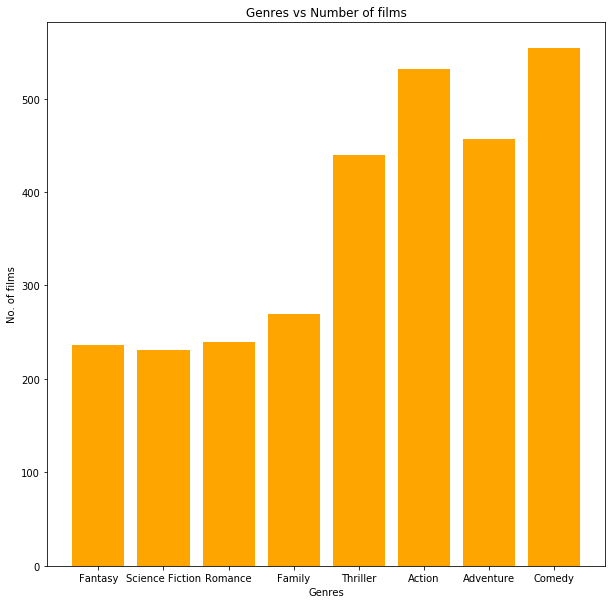

In [65]:
plt.figure(figsize=(10,10))
plt.xlabel('Genres')
plt.ylabel('No. of films')
plt.title('Genres vs Number of films')
plt.bar(x=kinds,height=freq,color='orange')
plt.show()

* From the above graph we understand that, comedy is the most common genre among profitable movies.

### Movie Language

In [66]:
lang=profit_list['spoken_languages'].values
kinds=['English','தமிழ்','Pусский','Español','Français','한국어/조선말','Dansk']
freq=[0,0,0,0,0,0,0]
for i in lang:
    cur=i.replace('[','').replace(']','').replace("'","").replace('"','')
    for i in range(0,7):
        freq[i]+=cur.count(kinds[i])
print('Number of profitable movies in each language: ')
for i in range(0,7):
    print(str(i+1)+" "+str(kinds[i])+"   "+str(freq[i]))

Number of profitable movies in each language: 
1 English   1495
2 தமிழ்   5
3 Pусский   78
4 Español   116
5 Français   146
6 한국어/조선말   13
7 Dansk   1


C:\Users\R.K.Athisha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\R.K.Athisha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2990 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\R.K.Athisha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3007 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\R.K.Athisha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2996 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\R.K.Athisha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\R.K.Athisha\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarn

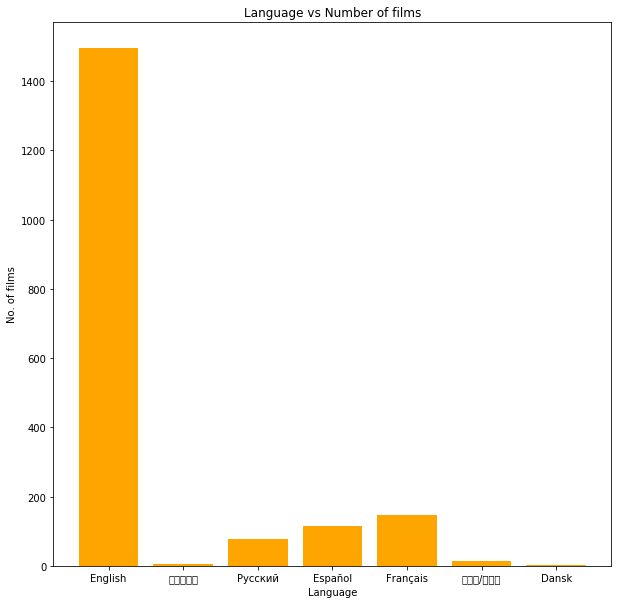

In [67]:
plt.figure(figsize=(10,10))
plt.xlabel('Language')
plt.ylabel('No. of films')
plt.title('Language vs Number of films')
plt.bar(x=kinds,height=freq,color='orange')
plt.show()

* Most of the profitable movies are made in English too.

### Production Countries

In [68]:
cou=profit_list['production_countries'].values
kinds=['United States of America','India','France','Russia','United Kingdom','Canada','Germany','Japan','New Zealand']
freq=[0,0,0,0,0,0,0,0,0]
for i in cou:
    cur=i.replace('[','').replace(']','').replace("'","").replace('"','')
    for i in range(0,9):
        freq[i]+=cur.count(kinds[i])
print('Number of profitable movies in each country: ')
for i in range(0,9):
    print(str(i+1)+" "+str(kinds[i])+"   "+str(freq[i]))

Number of profitable movies in each country: 
1 United States of America   1438
2 India   23
3 France   70
4 Russia   3
5 United Kingdom   203
6 Canada   64
7 Germany   98
8 Japan   31
9 New Zealand   15


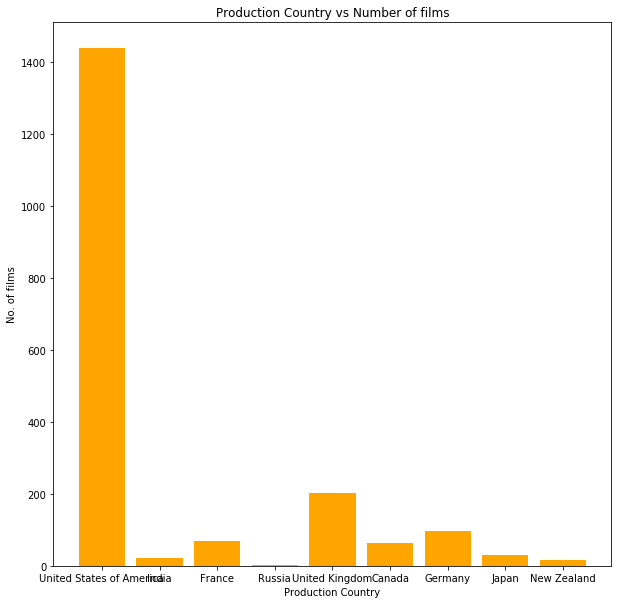

In [69]:
plt.figure(figsize=(10,10))
plt.xlabel('Production Country')
plt.ylabel('No. of films')
plt.title('Production Country vs Number of films')
plt.bar(x=kinds,height=freq,color='orange')
plt.show()

* Most of the profitable movies are produced in United States of America

### Runtime

In [70]:
runtime=profit_list['runtime']

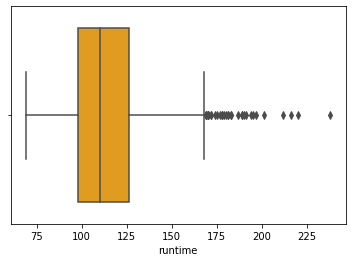

In [71]:
sns.boxplot(x=runtime,color='orange')

In [72]:
runtime.describe()

count    1543.000000
mean      113.968244
std        21.589158
min        69.000000
25%        98.000000
50%       110.000000
75%       126.000000
max       238.000000
Name: runtime, dtype: float64

* Average runtime of profitable movies= 113.97

### Revenue

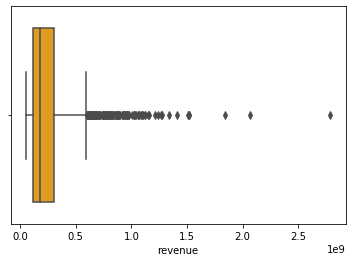

In [73]:
revenue=profit_list['revenue']
sns.boxplot(x=revenue,color='orange')

In [74]:
revenue.describe()

count    1.543000e+03
mean     2.559137e+08
std      2.364575e+08
min      5.152517e+07
25%      1.129496e+08
50%      1.745788e+08
75%      3.070095e+08
max      2.787965e+09
Name: revenue, dtype: float64

* Average revenue of profitable movies=  $ 255913700

### Budget

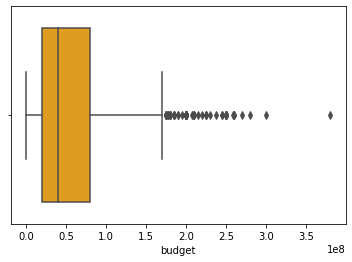

In [75]:
budget=profit_list['budget']
sns.boxplot(x=budget,color='orange')

In [76]:
budget.describe()

count    1.543000e+03
mean     5.998527e+07
std      5.422163e+07
min      1.130000e+02
25%      2.000000e+07
50%      4.000000e+07
75%      8.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

* Average budget of a profitable movie=  $ 59985270

# Hypothesis

From the 'movies' dataset we can conclude that in order to make a profitable movie:

* Average Budget= $ 60 Million
* Average Runtime= 113.97
* Recommended genre: Comedy,Action,Adventure and Thriller
* Recommended Language: English
* Recommended Production Country: United States of America

* We can expect an average revenue of $ 255 Million